In [1]:
#transfer learning model using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
#resource: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from tensorflow.keras import layers
import os
import zipfile
import cv2
from google.colab import drive
drive.mount('/content/drive')
print("success")
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
success
/content


In [0]:
with zipfile.ZipFile("./drive/My Drive/new_recognition_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("./dataset/images/")

In [3]:
dim = (224, 224)
data_path = "./dataset/images/"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_images = engine_images.flow_from_directory(str(data_path), target_size=dim)

Found 59379 images belonging to 2 classes.


In [4]:
mobilenet = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                                                                                     input_shape=(224,224,3))
mobilenet.trainable = False #dont train the pretrained model
model = tf.keras.Sequential([mobilenet, layers.Dense(2, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/32.0)
history = model.fit(training_images, epochs=5, steps_per_epoch=num_batches)

Epoch 1/5
1856/1856 [==============================] - 247s 133ms/step - loss: 0.0196 - accuracy: 0.9779
Epoch 2/5
1856/1856 [==============================] - 225s 121ms/step - loss: 0.0100 - accuracy: 0.9883
Epoch 3/5
1856/1856 [==============================] - 227s 122ms/step - loss: 0.0090 - accuracy: 0.9892
Epoch 4/5
1856/1856 [==============================] - 230s 124ms/step - loss: 0.0083 - accuracy: 0.9904
Epoch 5/5
1856/1856 [==============================] - 224s 121ms/step - loss: 0.0078 - accuracy: 0.9913


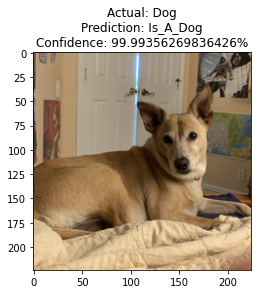

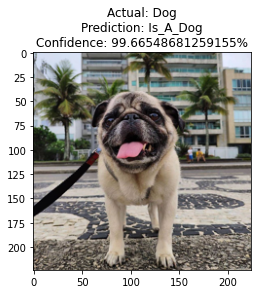

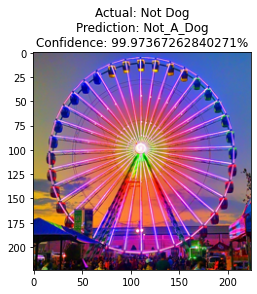

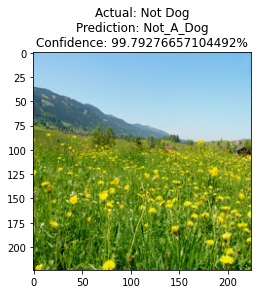

In [5]:
labels = sorted(training_images.class_indices.items(), key=lambda pair:pair[1])
labels = np.array([label.title() for label, val in labels])

plt.figure()
test_image=Image.open("./drive/My Drive/candy.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Dog"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./drive/My Drive/pug_instagram.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Dog"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./drive/My Drive/ferris.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Not Dog"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./drive/My Drive/meadow.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Not Dog"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")